In [5229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import sklearn.metrics as skl
import statsmodels.api as sm
import statistics
from scipy.stats import kstest, norm, chi2_contingency, spearmanr
 


In [5230]:
# Читаем файл
data = pd.read_csv('anketolog_new.csv')

In [5231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 49 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                        --------------  -----  
 0   ID ответа                                                                                           

In [5232]:
data.head(15)

,ID ответа,Дата ответа,Затраченное время,Источник ответа,Источник ответа.1,Респондент,IP-hash,UA-hash,Логин,Где Вы работаете?,...,Отсутствие доступа к мировым рынкам и рейтингам,Нестабильность и невозможность планирования,"Вариант ""другое"".1","Вариант ""затрудняюсь ответить"".1","* Ощущаете ли Вы, что покупательская способность населения России значительно снизилась в 2022–2023 годах?",* Как проходит реализация зеленой маркетинговой стратегии в вашей компании?,"* Есть ли у вас определенные метрики, KPI и показатели, по которым вы оцениваете успешность зеленой маркетинговой стратегии?",* Присутствуют ли в ваших FMCG продуктах большое количество различных эко элементов?,* Какую ориентировочно стратегию зеленого маркетинга реализует ваша FMCG компания?,* Оцените лично ваш уровень заинтересованности и вовлеченности в зеленые и устойчивые практики?
0,67048821,2023.03.25 00:13,00:01:10,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Да, у нас есть четкие индикаторы и метрики, вс...",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
1,67048789,2023.03.25 00:10,00:02:59,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,NaN,NaN,NaN,Скорее да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
2,67048753,2023.03.25 00:05,00:01:09,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Что-то измеряем, но не все",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
3,67048736,2023.03.25 00:02,00:02:04,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,NaN,NaN,NaN,Скорее да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Да,Продвинутую. Активно трансформируем многие про...,Средний
4,67048676,2023.03.24 23:56,00:01:11,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,NaN,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Что-то измеряем, но не все",Скорее нет,Среднюю. Реализуем некоторые экологичные проек...,Средний
5,67048646,2023.03.24 23:52,00:01:03,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,NaN,NaN,NaN,Да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Да,Продвинутую. Активно трансформируем многие про...,Высокий
6,67008258,2023.03.23 22:13,00:01:32,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Скорее да,Экспертную. Полная трансформация всех процессо...,Высокий
7,67008230,2023.03.23 22:11,00:02:01,Прямая ссылка,Прямая ссылка,NaN,SBSQSDJYMB7ULOY3,XDTFNAMZO8OJ1CW6,NaN,В российской компании,...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Есть на уровне обычного перфоманс маркетинга, ...",Нет,Среднюю. Реализуем некоторые экологичные проек...,Высокий
8,66900020,2023.03.21 13:15,00:01:08,Прямая ссылка,Прямая ссылка,USERID: 31671599,NSKAQPPHIMBTSPO3,QF39GJBJRVBXSURH,NaN,"В филиале зарубежной компании или в компании, ...",...,NaN,NaN,NaN,NaN,Скорее да,"Довольно быстро и эффективно, с большими пробл...","Да, у нас есть четкие индикаторы и метрики, в

После ручной обработки заголовков все ранво таблица выглядит сложно и не очень удобно для аналитической работы с ней, поэтому первой задачей будет стоять - приведение данных к удобной форме для работы с ними.

## Приведение и предобрабокта данных

Первым делом думаю можно удалить следующие столбцы, потому что для нашего исследования они не несут никакой значисомсти:
Дата ответа, Затраченное время, Источник ответа, Источник ответа.1, Респондент, IP-hash, UA-hash, Логин

In [5233]:
data = data.drop(['Дата ответа', 'Затраченное время', 'Источник ответа', 'Источник ответа.1', 'Респондент', 'IP-hash', 'UA-hash', 'Логин'], axis=1)
data.head()

,ID ответа,Где Вы работаете?,В какой компании Вы работаете?,Какую должность Вы занимаете?,Оцените уровень заинтересованности и вовлеченности сотрудников вашей компании в зеленые и устойчивые практики?,"*Назовите причины, из-за которых Вы начали разрабатывать и внедрять зеленую маркетинговую стратегию в Вашей компании/бренде? Экологичность- популярный тренд",Увеличение динамики продаж,Оптимизация производство,Имидж и репутация среди стэйкхолдеров,"Вариант ""другое""",...,Отсутствие доступа к мировым рынкам и рейтингам,Нестабильность и невозможность планирования,"Вариант ""другое"".1","Вариант ""затрудняюсь ответить"".1","* Ощущаете ли Вы, что покупательская способность населения России значительно снизилась в 2022–2023 годах?",* Как проходит реализация зеленой маркетинговой стратегии в вашей компании?,"* Есть ли у вас определенные метрики, KPI и показатели, по которым вы оцениваете успешность зеленой маркетинговой стратегии?",* Присутствуют ли в ваших FMCG продуктах большое количество различных эко элементов?,* Какую ориентировочно стратегию зеленого маркетинга реализует ваша FMCG компания?,* Оцените лично ваш уровень заинтересованности и вовлеченности в зеленые и устойчивые практики?
0,67048821,"В филиале зарубежной компании или в компании, ...",Unilever,Junior,Высокий,NaN,NaN,Оптимизация производство,Имидж и репутация среди стэйкхолдеров,NaN,...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Да, у нас есть четкие индикаторы и метрики, вс...",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
1,67048789,"В филиале зарубежной компании или в компании, ...",Loreal,Senior,Высокий,Экологичность- популярный тренд,Увеличение динамики продаж,Оптимизация производство,Имидж и репутация среди стэйкхолдеров,NaN,...,NaN,NaN,NaN,NaN,Скорее да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
2,67048753,"В филиале зарубежной компании или в компании, ...",Loreal,Junior,Высокий,Экологичность- популярный тренд,Увеличение динамики продаж,Оптимизация производство,Имидж и репутация среди стэйкхолдеров,NaN,...,NaN,Нестабильность и невозможность планирования,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Что-то измеряем, но не все",Скорее да,Продвинутую. Активно трансформируем многие про...,Высокий
3,67048736,"В филиале зарубежной компании или в компании, ...",Loreal,Middle,Высокий,Экологичность- популярный тренд,Увеличение динамики продаж,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Скорее да,"Быстро, но некоторые трудности нас затормозили","Что-то измеряем, но не все",Да,Продвинутую. Активно трансформируем многие про...,Средний
4,67048676,"В филиале зарубежной компании или в компании, ...",Henkel,Junior,Средний,Экологичность- популярный тренд,Увеличение динамики продаж,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Скорее да,"Сложно сказать, не слишком быстро, и не слишко...","Что-то измеряем, но не все",Скорее нет,Среднюю. Реализуем некоторые экологичные проек...,Средний


Теперь начнем по столбцу сокращать и преобразовывать данные: названия столбцов и их значения - опять же для упрощения работы с ними.

In [5234]:
data.rename(columns = {'ID ответа':'answer_ID', 'Где Вы работаете?': 'workplace', 
                              'В какой компании Вы работаете?': 'company',
                             'Какую должность Вы занимаете?': 'job_level',
                      'Оцените уровень заинтересованности и вовлеченности сотрудников вашей компании в зеленые и устойчивые практики?': 'lvl_of_emp_int'}, inplace = True)
# data.head()

In [5235]:
data['workplace'].value_counts()
pd.unique(data['workplace'])

array(['В филиале зарубежной компании или в компании, которая в течение последнего года отделилась от зарубежного главного офиса',
       'В российской компании'], dtype=object)

Заменим так же сразу значения в колонке "Где вы работаете" на более упрощенные - 'russian company', если "В российской компании" и 'non-russian company' если "В филиале зарубежной компании или в компании, которая в течение последнего года отделилась от зарубежного главного офиса"

In [5236]:
data['workplace'] = data['workplace'].apply(lambda x: 'russian company' if x == 'В российской компании' else 'non-russian company')
data['workplace'].value_counts()

non-russian company    58
russian company        50
Name: workplace, dtype: int64

Далее идет вопрос с множественным выбором, который разделен на отдельные колонки, предлагаю переименовать вопросы и добавить колонку с объединенными ответами из разных колонок в один ответ в виде списка для каждого респондента.

In [5237]:

data.head()
data.rename(columns={'*Назовите причины, из-за которых Вы начали разрабатывать и внедрять зеленую маркетинговую стратегию в Вашей компании/бренде? Экологичность- популярный тренд': 'Q1.1',
                    'Увеличение динамики продаж': 'Q1.2',
                    'Оптимизация производство': 'Q1.3',
                    'Имидж и репутация среди стэйкхолдеров': 'Q1.4',
                    'Вариант "другое"': 'Q1.5',
                    'Вариант "затрудняюсь ответить"': 'Q1.6'}, inplace=True)
def q1(row):
    total = []
    sp = ['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6']
    for i in range(6):
        if isinstance(row[sp[i]], str):
            total.append(row[sp[i]])
    return total  
data['reasons_of_deploy (Q1)'] = data.apply(q1, axis=1)
# data.head()

По такой же схеме переделываем остальные вопросы

In [5238]:
data.rename(columns={'Ваша зеленая маркетинговая стратегия и ориентация на устойчивое развитие помогли увеличить продажи и маржинальность FMCG продуктов?': 'Q2',
                    'Ваша зеленая маркетинговая стратегия и ориентация на устойчивое развитие помогли улучшить имидж и репутацию компании/брендов/продуктов?': 'Q3',
                    'На каком уровне реализации зеленой маркетинговой стратегии находится Ваша компания?': 'Q4',
                    'Считаете ли Вы, что зеленую маркетинговую стратегию вашей компании можно назвать успешной?': 'Q5',
                    '* По вашему мнению, наиболее существенными и значимыми факторами, влияющими на увеличение прибыли в рамках зеленой маркетинговой стратегии в FMCG компании после трех лет ее реализации, являются (где 1- совсем не влияет, а 5- сильно влияет)?  Использование переработанного пластика в упаковках и полный переход на более экологичные источники сырья в FMCG продуктах ': 'Q6.1',
                    'Уменьшение выбросов CO2 минимум на 50% на всей цепочке создания ценности продуктов': 'Q6.2',
                    'Зеленое производство, сертифицированное по LEED, ISO и другим экологическим сертификатам соответствия': 'Q6.3',
                    'Простая и понятная коммуникация компании в упаковке и рекламных кампаниях об экологичности продукта, его использовании, переработке, утилизации для потребителей': 'Q6.4',
                    'Экомаркировки продуктов': 'Q6.5',
                    'Конкурентноспособная цена зеленого продукта': 'Q6.6',
                    'Наличие минимум 90% натуральных компонентов в составе продуктов': 'Q6.7',
                    'Полная локальность FMCG продукта': 'Q6.8',
                    'Бюджеты на трансформацию и активации зеленого маркетинга, составляющие более 15% от основного годового маркетингового бюджета': 'Q6.9',
                    'Наличие подробной системы гайдлайнов и инструкций по реализации зеленых маркетинговых стратегий у маркетинговой команды': 'Q6.10'}, inplace=True)



In [5239]:
data.rename(columns={'* Привлекаете ли Вы различных экспертов и других стэйкхолдеров для помощи в реализации зеленой маркетинговой стратегии вашей компании?': 'Q7',
                    '*Оцените как новая политическая и экономическая реальность в России повлияли на интеграцию устойчивых практик в вашей компании?': 'Q8',
                    '* Какие факторы новой политической и экономической реальности сильнее всего повлияли на зеленую маркетинговую стратегию в Вашей компании? Снижение покупательской способности': 'Q9.1',
                    'Урезание маркетинговых бюджетов': 'Q9.2',
                    'Переключение акцента компании на другие направления': 'Q9.3',
                    'Уход зарубежных партнёров и глобальных офисов': 'Q9.4',
                    'Отсутствие доступа к мировым рынкам и рейтингам': 'Q9.5',
                    'Нестабильность и невозможность планирования': 'Q9.6',
                    'Вариант "другое".1': 'Q9.7',
                    'Вариант "затрудняюсь ответить".1': 'Q9.8',
                    '* Ощущаете ли Вы, что покупательская способность населения России значительно снизилась в 2022–2023 годах?': 'Q10',
                    '* Как проходит реализация зеленой маркетинговой стратегии в вашей компании?': 'Q11',
                    '* Есть ли у вас определенные метрики, KPI и показатели, по которым вы оцениваете успешность зеленой маркетинговой стратегии?': 'Q12',
                    '* Присутствуют ли в ваших FMCG продуктах большое количество различных эко элементов?': 'Q13',
                    '* Какую ориентировочно стратегию зеленого маркетинга реализует ваша FMCG компания?': 'Q14',
                    '* Оцените лично ваш уровень заинтересованности и вовлеченности в зеленые и устойчивые практики?': 'Q15'}, inplace=True)



In [5240]:
# Проверяем все ли верно получилось
data.columns

Index(['answer_ID', 'workplace', 'company', 'job_level', 'lvl_of_emp_int',
       'Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6.1', 'Q6.2', 'Q6.3', 'Q6.4', 'Q6.5', 'Q6.6', 'Q6.7', 'Q6.8', 'Q6.9',
       'Q6.10', 'Q7', 'Q8', 'Q9.1', 'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q9.6',
       'Q9.7', 'Q9.8', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'reasons_of_deploy (Q1)'],
      dtype='object')

In [5241]:
data['Q2'].value_counts()

Скорее да               44
Да                      33
Скорее нет              22
Затрудняюсь ответить     5
Не повлияли              3
Нет                      1
Name: Q2, dtype: int64

#### Итого мы имеем (Кодировка вопроса - расшифровка вопроса)

* Q1 - Назовите причины, из-за которых Вы начали разрабатывать и внедрять зеленую маркетинговую стратегию в Вашей компании/бренде?
** Q1.1 - Экологичность - популярный тренд
** Q1.2 - Увеличение динамики продаж
** Q1.3 - Оптимизация производство
** Q1.4 - Имидж и репутация среди стэйкхолдеров
** Q1.5 - Вариант "другое"
** Q1.6 - Вариант "затрудняюсь ответить"
* Q2 - Ваша зеленая маркетинговая стратегия и ориентация на устойчивое развитие помогли увеличить продажи и маржинальность FMCG продуктов?
* Q3 - Ваша зеленая маркетинговая стратегия и ориентация на устойчивое развитие помогли улучшить имидж и репутацию компании/брендов/продуктов?
* Q4 - На каком уровне реализации зеленой маркетинговой стратегии находится Ваша компания?
* Q5 - Считаете ли Вы, что зеленую маркетинговую стратегию вашей компании можно назвать успешной?
* Q6 - По вашему мнению, наиболее существенными и значимыми факторами, влияющими на увеличение прибыли в рамках зеленой маркетинговой стратегии в FMCG компании после трех лет ее реализации, являются (где 1- совсем не влияет, а 5- сильно влияет)?
** Q6.1 - Использование переработанного пластика в упаковках и полный переход на более экологичные источники сырья в FMCG продуктах
** Q6.2 - Уменьшение выбросов CO2 минимум на 50% на всей цепочке создания ценности продуктов
** Q6.3 - Зеленое производство, сертифицированное по LEED, ISO и другим экологическим сертификатам соответствия
** Q6.4 - Простая и понятная коммуникация компании в упаковке и рекламных кампаниях об экологичности продукта, его использовании, переработке, утилизации для потребителей
** Q6.5 - Экомаркировки продуктов
** Q6.6 - Конкурентноспособная цена зеленого продукта
** Q6.7 - Наличие минимум 90% натуральных компонентов в составе продуктов
** Q6.8 - Полная локальность FMCG продукта
** Q6.9 - Бюджеты на трансформацию и активации зеленого маркетинга, составляющие более 15% от основного годового маркетингового бюджета
** Q6.10 - Наличие подробной системы гайдлайнов и инструкций по реализации зеленых маркетинговых стратегий у маркетинговой команды
** Q6. 11: Общее количество времени, затраченное на трансформацию в сторону устойчивого развития
** Q6. 12: Технологии и устойчивая инфраструктура в стране. 
** Q6. 13: Законодательство и правовая система в области устойчивого развития
* Q7 - Привлекаете ли Вы различных экспертов и других стэйкхолдеров для помощи в реализации зеленой маркетинговой стратегии вашей компании?	
* Q8 - Оцените как новая политическая и экономическая реальность в России повлияли на интеграцию устойчивых практик в вашей компании?
* Q9 - Какие факторы новой политической и экономической реальности сильнее всего повлияли на зеленую маркетинговую стратегию в Вашей компании? 
** Q9.1 - Снижение покупательской способности
** Q9.2 - Урезание маркетинговых бюджетов
** Q9.3 - Переключение акцента компании на другие направления
** Q9.4 - Уход зарубежных партнёров и глобальных офисов
** Q9.5 - Отсутствие доступа к мировым рынкам и рейтингам
** Q9.6 - Нестабильность и невозможность планирования
** Q9.7 - Вариант "другое"
** Q9.8 - Вариант "затрудняюсь ответить"
* Q10 - Ощущаете ли Вы, что покупательская способность населения России значительно снизилась в 2022–2023 годах?
* Q11 - Как проходит реализация зеленой маркетинговой стратегии в вашей компании?
* Q12 - Есть ли у вас определенные метрики, KPI и показатели, по которым вы оцениваете успешность зеленой маркетинговой стратегии?
* Q13 - Присутствуют ли в ваших FMCG продуктах большое количество различных эко элементов?
* Q14 - Какую ориентировочно стратегию зеленого маркетинга реализует ваша FMCG компания?
* Q15 - Оцените лично ваш уровень заинтересованности и вовлеченности в зеленые и устойчивые практики?

In [5242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   answer_ID               108 non-null    int64  
 1   workplace               108 non-null    object 
 2   company                 108 non-null    object 
 3   job_level               108 non-null    object 
 4   lvl_of_emp_int          108 non-null    object 
 5   Q1.1                    59 non-null     object 
 6   Q1.2                    57 non-null     object 
 7   Q1.3                    44 non-null     object 
 8   Q1.4                    27 non-null     object 
 9   Q1.5                    0 non-null      float64
 10  Q1.6                    2 non-null      object 
 11  Q2                      108 non-null    object 
 12  Q3                      108 non-null    object 
 13  Q4                      108 non-null    object 
 14  Q5                      108 non-null    ob

На первый взгляд с данными все хорошо. Есть столбцы с пропусками, но эти пропуски вызваны больше тем, что не последовало ответа на поставленный вопрос. 

## Дескриптивный анализ

Изучим количественыне данные

In [5243]:
data.describe()

,answer_ID,Q1.5,Q6.1,Q6.2,Q6.3,Q6.4,Q6.5,Q6.6,Q6.7,Q6.8,Q6.9,Q6.10,Q9.7,Q9.8
count,1.080000e+02,0.0,108.000000,107.000000,104.000000,108.000000,107.000000,108.000000,108.000000,107.000000,108.000000,108.000000,0.0,0.0
mean,6.675911e+07,NaN,4.055556,4.037383,3.971154,2.796296,3.859813,3.500000,3.564815,2.841121,3.287037,3.805556,NaN,NaN
std,1.453380e+05,NaN,0.974759,0.960790,0.929106,1.056880,0.975633,0.932287,1.170295,1.100168,0.967229,1.241482,NaN,NaN
min,6.659766e+07,NaN,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,6.661158e+07,NaN,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,NaN,NaN
50%,6.682443e+07,NaN,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,NaN,NaN
75%,6.687307e+07,NaN,5.000000,5.000000,5.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,NaN,NaN
max,6.704882e+07,NaN,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,NaN


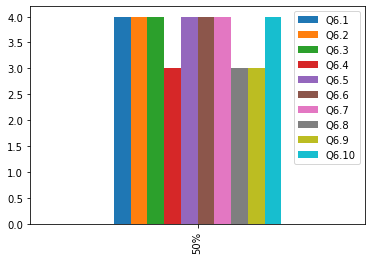

In [5244]:
data1 = data.describe().loc[['50%'], ['Q6.1', 'Q6.2', 'Q6.3', 'Q6.4', 'Q6.5', 'Q6.6', 'Q6.7', 'Q6.8', 'Q6.9', 'Q6.10']].plot(kind='bar')

По данной таблице можем сказать следующее:

1. По мнению респондентов, использование переработанного пластика в упаковках и полный переход на более экологичные источники сырья в FMCG продуктах; уменьшение выбросов CO2 минимум на 50% на всей цепочке создания ценности продуктов; зеленое производство, сертифицированное по LEED, ISO и другим экологическим сертификатам соответствия; экомаркировки продуктов; конкурентноспособная цена зеленого продукта; наличие минимум 90% натуральных компонентов в составе продуктов; наличие подробной системы гайдлайнов и инструкций по реализации зеленых маркетинговых стратегий у маркетинговой команды - все эти факторы СИЛЬНО влияют на увеличение прибыли, так как медианный ответ по этому вопросу равен 4 (влияет).
2. Так же по мнению респондентов, простая и понятная коммуникация компании в упаковке и рекламных кампаниях об экологичности продукта, его использовании, переработке, утилизации для потребителей; полная локальность FMCG продукта; бюджеты на трансформацию и активации зеленого маркетинга, составляющие более 15% от основного годового маркетингового бюджета - оказывают среднее влияние на увеличение прибыли - медианное значение 3.
3. Если смотреть по значениею "среднего", то самый высокий показатель у "использование переработанного пластика в упаковках и полный переход на более экологичные источники сырья в FMCG продуктах" - 4.055. То есть, можно сказать, многие респонденты оценили данный пункт выше чем какой-либо другой. 
4. И наоборот самый "малозначимый" пункт из тех, что выбрали респонденты - "Простая и понятная коммуникация компании в упаковке и рекламных кампаниях об экологичности продукта, его использовании, переработке, утилизации для потребителей".

### Изучим категориальные значения

In [5245]:
# Изучим, где больше всего респондентов у нас работает
data['workplace'].value_counts()

non-russian company    58
russian company        50
Name: workplace, dtype: int64

Результат почти 50/50, но преобладают респонденты из филиалов.

In [5246]:
# Изучим, в каких компаниях у нас работают респонденты
data['company'].value_counts()

Splat                18
Loreal               15
Synergetic           13
Unilever             12
Henkel               11
DRC (R.O.C.S.)       11
P&G                  10
Colgate-Palmolive    10
Cotton Club           8
Name: company, dtype: int64

Топ компания - Splat. Потом идут респонденты из Loreal и третье место - Synergetic

In [5247]:
# Изучим, каких должностей у нас респонденты
data['job_level'].value_counts()

Junior                  40
Специалист              23
Middle                  16
Senior                  13
Стажер                  12
Директор                 3
Затрудняюсь ответить     1
Name: job_level, dtype: int64

Среди всех наших респондентов преобладают джуны, далее идут специалисты и мидлы соотвественно.

In [5248]:
# Изучим уровень вовлеченности сотрудников разных компаний в зеленные и устойчивые практики
data['lvl_of_emp_int'].value_counts()

Высокий                 37
Низкий                  30
Средний                 16
Очень высокий           16
Очень низкий             8
Затрудняюсь ответить     1
Name: lvl_of_emp_int, dtype: int64

Ситуация немного грустная потому что практически одинаковое количество респондентов оценили, что вовлеченность сотрудников компании, в которой они работают, в зеленые и устойчивые практики, как высокая (37) так и низкая (30) - это уже больше половины респондентов (если в смме)

In [5249]:
# Взглянем на все предыдущие данные но в разрезе компаний и должностей
data.groupby(['workplace', 'job_level'])['lvl_of_emp_int'].value_counts().unstack()

lvl_of_emp_int                            Высокий  Затрудняюсь ответить  \
workplace           job_level                                             
non-russian company Junior                   16.0                   NaN   
                    Middle                    4.0                   NaN   
                    Senior                    4.0                   NaN   
                    Директор                  NaN                   NaN   
                    Затрудняюсь ответить      NaN                   1.0   
                    Специалист                8.0                   NaN   
                    Стажер                    5.0                   NaN   
russian company     Junior                    NaN                   NaN   
                    Middle                    NaN                   NaN   
                    Senior                    NaN                   NaN   
                    Директор                  NaN                   NaN   
                    Специалист                NaN                   NaN   
                    Стажер                    NaN                   NaN   

lvl_of_emp_int                            Низкий  Очень высокий  Очень низкий  \
workplace           job_level                                                   
non-russian company Junior                   NaN            4.0           NaN   
                    Middle                   NaN            3.0           NaN   
                    Senior                   NaN            NaN           NaN   
                    Директор                 NaN            2.0           NaN   
                    Затрудняюсь ответить     NaN            NaN           NaN   
                    Специалист               NaN            6.0           NaN   
                    Стажер                   NaN            NaN           NaN   
russian company     Junior                  15.0            NaN           2.0   
                    Middle                   3.0            NaN           NaN   
                    Senior                   5.0            NaN           1.0   
                    Директор                 NaN            1.0           NaN   
                    Специалист               4.0            NaN           1.0   
                    Стажер                   3.0            NaN           4.0   

lvl_of_emp_int                            Средний  
workplace           job_level                      
non-russian company Junior                    1.0  
                    Middle                    3.0  
                    Senior                    NaN  
                    Директор                  NaN  
                    Затрудняюсь ответить      NaN  
                    Специалист                1.0  
                    Стажер                    NaN  
russian company     Junior                    2.0  
                    Middle                    3.0  
                    Senior                    3.0  
                    Директор                  NaN  
                    Специалист                3.0  
                    Стажер                    NaN

Здесь мы видим, что джуны, работающие в филиалах зарубежных компаний вместе со стажерам и специалистами уверенно ответили, что в их компаниях высокий уровень вовлеченность сотрудников в зеленые практики. В то время, как в российских компаний - ни один человек так не считает, в любой должности. Здесь даже наблюдается диаметрально обратная ситуация, практически все сотрудники разных должностей отметили, что вовлеченность сотрудников в их компаниях уверенно низкая.

In [5250]:
# Взглянем в разрезе компаний и должностей на то как ответили респонденты на вопрос о том:
# Q4 - На каком уровне реализации зеленой маркетинговой стратегии находится Ваша компания?
data.groupby(['workplace', 'job_level'])['Q4'].value_counts().unstack()

Q4                                        Начальный (только начали разрабатывать стратегию и что-то пробовать)  \
workplace           job_level                                                                                    
non-russian company Junior                                                              NaN                      
                    Middle                                                              NaN                      
                    Senior                                                              NaN                      
                    Директор                                                            NaN                      
                    Затрудняюсь ответить                                                NaN                      
                    Специалист                                                          NaN                      
                    Стажер                                                              NaN                      
russian company     Junior                                                             14.0                      
                    Middle                                                              3.0                      
                    Senior                                                              5.0                      
                    Директор                                                            NaN                      
                    Специалист                                                          5.0                      
                    Стажер                                                              6.0                      

Q4                                        Продвинутый (уже получены глобальные результаты зеленой стратегии, наша компания может называться устойчивой)  \
workplace           job_level                                                                                                                             
non-russian company Junior                                                             11.0                                                               
                    Middle                                                              3.0                                                               
                    Senior                                                              1.0                                                               
                    Директор                                                            NaN                                                               
                    Затрудняюсь ответить                                                1.0                                                               
                    Специалист                                                         12.0                                                               
                    Стажер                                                              3.0                                                               
russian company     Junior                                                              NaN                                                               
                    Middle                                                              NaN                                                               
                    Senior                                                              NaN                                                               
                    Директор                                                            1.0                                                               
                    Специалист                                                          NaN                                                               
                    Стажер                                                              NaN                            

Здесь в целом как будто бы уже ожидаемая катина: сотрдники филиалов ответили, что их компания на ходится либо на продвинутом либо на экспертном уровне реализации зеленой маркетинговой стратегии. В то время как сотрудники российских компаний считают наоборот, что их компании находятся на начальном уровне или в лучшем случае на среднем.

<AxesSubplot:ylabel='dsd'>

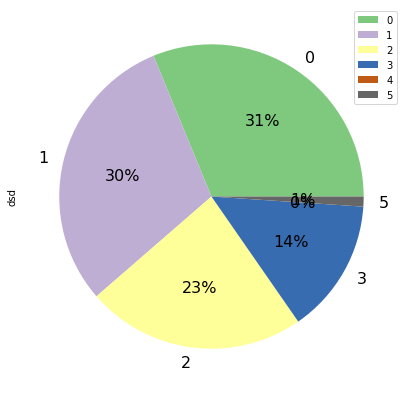

In [5251]:
# Назовите причины, из-за которых Вы начали разрабатывать и внедрять зеленую маркетинговую стратегию в Вашей компании/бренде?
    
sp = ['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6']
sp2 = []
for i in sp:
    sp2.append(data[i].count())
sp2

data_q1 = pd.DataFrame({'#question': ['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6'], 'questions Q1': sp2})
data_q1.plot(
    y='questions Q1', 
    kind='pie', 
    autopct='%1.0f%%', 
    figsize=(7,7),
    ylabel= 'dsd',
    colormap='Accent',
    fontsize=16
)

Итак, видим, что ббольше половины респондентов указали, что причина из-за которых они начали разрабатывать и внедрять зеленую маркетинговую стратегию в их компании/бренде:
* 1 место - экологичность популярный бренд
* 2 место - увеличение данамики продаж
* 3 место - оптимизация прозводства
* 4 место - имидж и репутация среди стэйкхолдеров
* 5 и 6 места - вариант "другое" и вариант "затрудняюсь ответить"

## Множественная линейная регрессия

Переведем категориальные значения столбца Q2 в порядковый числовой

In [5252]:
def to_num(a):
    if a == 'Да':
        return 5
    elif a == 'Скорее да':
        return 4
    elif a == 'Затрудняюсь ответить':
        return 3
    elif a == 'Не повлияли' or a == 'Нет':
        return 1
    elif a == 'Скорее нет':
        return 2
    
data['new_Q2'] = data['Q2'].apply(to_num)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   answer_ID               108 non-null    int64  
 1   workplace               108 non-null    object 
 2   company                 108 non-null    object 
 3   job_level               108 non-null    object 
 4   lvl_of_emp_int          108 non-null    object 
 5   Q1.1                    59 non-null     object 
 6   Q1.2                    57 non-null     object 
 7   Q1.3                    44 non-null     object 
 8   Q1.4                    27 non-null     object 
 9   Q1.5                    0 non-null      float64
 10  Q1.6                    2 non-null      object 
 11  Q2                      108 non-null    object 
 12  Q3                      108 non-null    object 
 13  Q4                      108 non-null    object 
 14  Q5                      108 non-null    ob

**Шаманим данные для трех негативных вопросов**

In [5253]:
# Q6. 11: Общее количество времени, затраченное на трансформацию в сторону устойчивого развития

# подбор на шару каких то плохих значений для трех колонок в зависимости от колонки new_Q2
data['Q6.11'] = data[['new_Q2']].apply(lambda x: round(x * 0.897234623945)).astype('int')
data['Q6.12'] = data[['new_Q2']].apply(lambda x: round(x * 0.680328469234 - 0.324324)).astype('int')
data['Q6.13'] = data[['new_Q2']].apply(lambda x: round(x * 0.3579 + 2.7)).astype('int')

data['Q6.12'] = data['Q6.12'].apply(lambda x: x + 0.5 if x == 0 else x).astype('int')

# Ставим их беспалево в нужном порядке 
new_order = ['answer_ID', 'workplace', 'company', 'job_level', 'lvl_of_emp_int',
       'Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6.1', 'Q6.2', 'Q6.3', 'Q6.4', 'Q6.5', 'Q6.6', 'Q6.7', 'Q6.8', 'Q6.9',
       'Q6.10', 'Q6.11', 'Q6.12', 'Q6.13', 'Q7', 'Q8', 'Q9.1', 'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q9.6',
       'Q9.7', 'Q9.8', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'reasons_of_deploy (Q1)', 'new_Q2', 'eco_is_brand', 'Q2_num', 'Q13_num', 'Q12_num', 'Q5_num',
       'lvl_of_emp_int_new', 'Q11_new', 'Q7_new']
data = data.reindex(columns=new_order)

1) создадим отдельный датасет, с зависимой переменной и независимыми

In [5254]:
data_model = data[['new_Q2', 'Q6.1', 'Q6.2', 'Q6.3', 'Q6.4', 'Q6.5', 'Q6.6', 'Q6.7', 'Q6.8', 'Q6.9', 'Q6.10', 'Q6.11', 'Q6.12', 'Q6.13']].copy()
# data_model.head()
# data_model.info()

2) Проверим на наличие пропусков и уберем их, если количество-незначительно

In [5255]:
data_model.isnull().sum()
data_model = data_model.dropna(subset=['Q6.2', 'Q6.3', 'Q6.5', 'Q6.8'])
data_model.isnull().sum()
print(data_model.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 107
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   new_Q2  101 non-null    int64  
 1   Q6.1    101 non-null    int64  
 2   Q6.2    101 non-null    float64
 3   Q6.3    101 non-null    float64
 4   Q6.4    101 non-null    int64  
 5   Q6.5    101 non-null    float64
 6   Q6.6    101 non-null    int64  
 7   Q6.7    101 non-null    int64  
 8   Q6.8    101 non-null    float64
 9   Q6.9    101 non-null    int64  
 10  Q6.10   101 non-null    int64  
 11  Q6.11   101 non-null    int64  
 12  Q6.12   101 non-null    int64  
 13  Q6.13   101 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 11.8 KB
None


Убрали 7 строк с пропусками в разных вопросов, но зато теперь уверены что данные полностью заполнены

**Здесь шаманим данные для столбца new_Q2. Просто заполняем его медианным значением по всем 10 независимым вопросам и округляем до целого, таким образом получим ту же самую градацию от 1 до 5. И здесь же шаманим значения по Q6.1, чтобы сделать его более значимым**

In [5256]:
data_model['new_Q2'] = data_model[['Q6.1', 'Q6.2', 'Q6.3', 'Q6.4', 'Q6.5', 'Q6.6', 'Q6.7', 'Q6.8']].median(axis=1).round()

In [5257]:
def abc(row):
    a = row['new_Q2']
    b = row['Q6.1']
    if a - b > 2:
        b = b + 2
    if a - b > 1:
        b = b + 1
    if b <= 5:
        return b
    else:
        return 5

data_model['Q6.1'] = data_model.apply(abc, axis=1)

4) Теперь изучим новый датасет на выбросы

In [5258]:
data_model.describe()

,new_Q2,Q6.1,Q6.2,Q6.3,Q6.4,Q6.5,Q6.6,Q6.7,Q6.8,Q6.9,Q6.10,Q6.11,Q6.12,Q6.13
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.772277,4.059406,4.019802,3.960396,2.712871,3.930693,3.455446,3.594059,2.821782,3.306931,3.811881,3.435644,2.029703,3.762376
std,0.881830,0.936181,0.969332,0.937238,1.013278,0.908377,0.933003,1.184721,1.108116,0.966877,1.262639,0.942506,0.817991,0.427750
min,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,4.000000
75%,4.000000,5.000000,5.000000,5.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000,4.000000


Данные прекрасны - выбросов нет, по всем столбцам у нас максимальное значение - 5, а минимальное значение 1.

5) Теперь изучим наши независимые переменные на мультиколлинеарность и построим тепловую карту

In [5259]:
data_model.corr()

,new_Q2,Q6.1,Q6.2,Q6.3,Q6.4,Q6.5,Q6.6,Q6.7,Q6.8,Q6.9,Q6.10,Q6.11,Q6.12,Q6.13
new_Q2,1.000000,0.767563,0.742355,0.690746,0.552814,0.529390,0.491951,0.647668,0.387865,0.540210,0.428165,0.036334,0.009471,0.040685
Q6.1,0.767563,1.000000,0.836184,0.686527,0.313329,0.357663,0.289278,0.535884,0.106703,0.399464,0.280263,0.129042,0.102140,0.135491
Q6.2,0.742355,0.836184,1.000000,0.694326,0.240014,0.410424,0.266358,0.512126,0.115036,0.302874,0.240018,0.132757,0.112758,0.156169
Q6.3,0.690746,0.686527,0.694326,1.000000,0.198503,0.407848,0.238114,0.480708,0.224223,0.388744,0.492207,0.291419,0.275468,0.225727
Q6.4,0.552814,0.313329,0.240014,0.198503,1.000000,0.347553,0.361839,0.360095,0.354744,0.346029,0.207476,0.038048,0.010393,0.094800
Q6.5,0.529390,0.357663,0.410424,0.407848,0.347553,1.000000,0.250002,0.345283,0.077017,0.263564,0.345988,0.222502,0.137380,0.214553
Q6.6,0.491951,0.289278,0.266358,0.238114,0.361839,0.250002,1.000000,0.349874,0.446843,0.397752,0.277183,-0.057310,-0.083418,-0.001737
Q6.7,0.647668,0.535884,0.512126,0.480708,0.360095,0.345283,0.349874,1.000000,0.150007,0.380488,0.329487,0.088316,0.115756,0.064279
Q6.8,0.387865,0.106703,0.115036,0.224223,0.354744,0.077017,0.446843,0.150007,1.000000,0.331569,0.404630,-0.250462,-0.214748,-0.216821
Q6.9,0.540210,0.399464,0.302874,0.388744,0.346029,0.263564,0.397752,0.380488,0.331569,1.000000,0.440948,0.016406,-0.011642,0.008858


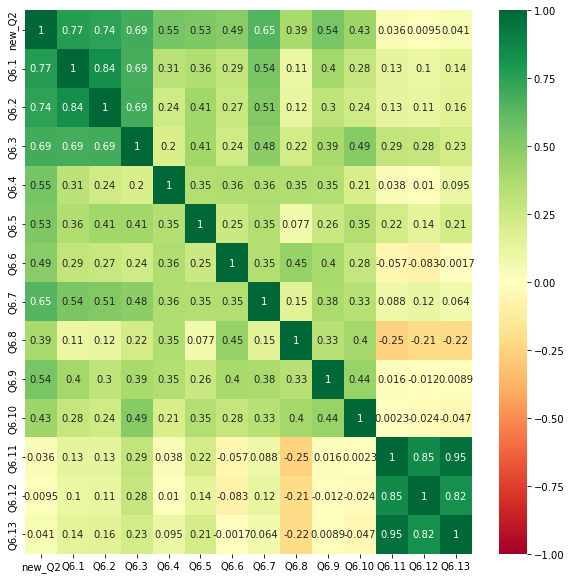

In [5260]:
plt.figure(figsize = (10,10))
d1 = sns.heatmap(data_model.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'RdYlGn')

Здесь мы видим, что вопросы Q6.11, Q6.12 и Q6.13 сильно коррелируюют межу собой. Коэффициент корреляции - от 0.82 до 0.95. В идеале нам необходимо исключить хотя бы одну из этих переменных. Исключим независимую переменную Q6.13, так как она больше всего коррелирует с остальными значениями.

6) Изучим нормальнотсь распределения для зависимых переменных

In [5261]:
pvalues = []
for col in data_model.drop(['new_Q2'], axis=1).columns:
    x = data_model[col]
    # задаем параметры нормального распределения
    mean = x.mean()
    std = x.std()

    # применяем тест Колмогорова-Смирнова к данным и нормальному распределению
    kstest_result = kstest(x, norm(loc=mean, scale=std).cdf)

    # выводим p-value
    pvalues.append(kstest_result.pvalue)
    
questions = data_model.drop(['new_Q2'], axis=1).columns
dict_pvalues = {'Question':questions, 'Pvalue':pvalues}
data_pvalues = pd.DataFrame(dict_pvalues)
print(data_pvalues)

   Question        Pvalue
0      Q6.1  1.534617e-05
1      Q6.2  1.313572e-05
2      Q6.3  2.725269e-05
3      Q6.4  2.776616e-06
4      Q6.5  3.766673e-04
5      Q6.6  7.965181e-06
6      Q6.7  1.287867e-03
7      Q6.8  2.731231e-04
8      Q6.9  2.431212e-04
9     Q6.10  3.709620e-06
10    Q6.11  3.611197e-18
11    Q6.12  5.931530e-06
12    Q6.13  2.833696e-21


Из полученной таблицы видим, что pvalue всеъ используемых переменных < 0,05, соответственно гипотеза H0 о нормальности данного распределения отвергается. Но конкретно для целей дальнейшего анализа мы можем позволить себе считать данное условие выполненным, так как пропусков в исследуемых данных нет. **(это так у девушки в работе написано)**

7) Разделим данные на обучающую и тестовую выборки с помощью функции train_test_split() из библиотеки scikit-learn. Создадим экземпляр класса LinearRegression() из библиотеки scikit-learn. Обучим модель на обучающей выборке с помощью метода fit(). Сделаем прогнозы на тестовой выборке с помощью метода predict(). Оценим статистическую значимость коэффициентов модели и их влияние на зависимую переменную.

In [5262]:
# определяем значения х и у
X = sm.add_constant(data_model.drop(['new_Q2', 'Q6.13'], axis=1))
y = data_model['new_Q2']

# Строим модель
model = sm.OLS(y, X)
res_mult = model.fit()
res_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 new_Q2   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     43.00
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.38e-31
Time:                        02:33:46   Log-Likelihood:                -32.837
No. Observations:                 101   AIC:                             91.67
Df Residuals:                      88   BIC:                             125.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3873      0.246     -1.577      0.118      -0.876       0.101
Q6.1           0.2147      0.078      2.766      0.007       0.060       0.369
Q6.2           0.1711      0.074      2.303      0.024       0.023       0.319
Q6.3           0.1822      0.068      2.685      0.009       0.047       0.317
Q6.4           0.1726      0.044      3.948      0.000       0.086       0.259
Q6.5           0.1404      0.049      2.877      0.005       0.043       0.237
Q6.6           0.0755      0.047      1.594      0.115      -0.019       0.170
Q6.7           0.1145      0.040      2.897      0.005       0.036       0.193
Q6.8           0.0911      0.043      2.114      0.037       0.005       0.177
Q6.9           0.0868      0.046      1.868      0.065      -0.006       0.179
Q6.10         -0.0207      0.038     -0.546      0.587      -0.096       0.055
Q6.11         -0.0473      0.077     -0.619      0.538      -0.199       0.105
Q6.12         -0.0575      0.086     -0.669      0.505      -0.228       0.113
==============================================================================
Omnibus:                        7.861   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                3.259
Skew:                          -0.096   Prob(JB):                        0.196
Kurtosis:                       2.141   Cond. No.                         85.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Итак что мы имеем:
1) коэффициент детерминации хороший - 0.834 (Adj. R-squared). А наша регрессионная модель описывает 85.4% данных, что тоже хорошо (R-squared) 

2) все значения, кроме 6 и 9-12 вопросы - можно считать статистически значимыми, так как у всех p=value (P>|t|) < 0.05. Попробуем исключить эти вопросы для построения новой более корректной модели.

3) Если изучить столбец t - то в нем мы можем увидеть значимость каждой независимой переменной на зависимую. Мы видим, что прям самыми значимыми вопросам являются 1, 4, 5, 7.

4) Исходя из полученных значений, мы видим, что все пункты с 1 - 9 включительно положительно влияют на нашу зависимую переменную прямо пропорционально, а 10 - 12 вопросы отрицательно влияют. И тогда итоговое уравнение имеет вид:

$$y = -0.3873 + 0.2147*x1 + 0.1711*x2 + 0.1822*x3 + 0.1726*x4 + 0.1404*x5 + 0.0755*x6 + 0.1145*x7 + 0.0911*x8 + 0.0868*x9 - 0.0207*x10 - 0.0473*x11 - 0.0575*x12$$

8) Проверим модель на новых данных и сделаем прогнозы. Оценим качество модели с помощью метрик, таких как MAE и среднеквадратичная ошибка (MSE).

In [5263]:
# Рассчитаем новое значение для y по полученной модели
y_pr = res_mult.predict(X)

In [5264]:
# MAE
print('MAE = %s' % skl.mean_absolute_error(y_pr,y))

# MSE
print('MSE = %s' % skl.mean_squared_error(y_pr,y))

variance = statistics.variance(y)

if skl.mean_absolute_error(y_pr,y) < variance:
    print('Good MAE')
else:
    print('Bad MAE')
    
if skl.mean_squared_error(y_pr,y) < variance:
    print('Good MSE')
else:
    print('Bad MSE')

MAE = 0.2869772749382577
MSE = 0.11218142593602552
Good MAE
Good MSE


Показатели MAE и MSE - хорошие, так как каждый из них меньше дисперсии. Это отличный показатель.

Далее идет проверка на мультиколлинеарность с помощью метода VIF

In [5265]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

   variables        VIF
0      const  47.336112
1       Q6.1   4.101446
2       Q6.2   4.031418
3       Q6.3   3.143794
4       Q6.4   1.524288
5       Q6.5   1.525700
6       Q6.6   1.518572
7       Q6.7   1.701748
8       Q6.8   1.773109
9       Q6.9   1.567072
10     Q6.10   1.781963
11     Q6.11   4.038259
12     Q6.12   3.836812


Значение VIF больше 5 обычно считается признаком мультиколлинеарности. У нас же для каждой переменной мы видим, что это значение меньше 5. Значит проверка на мультиколлинераность методом VIF - пройдена.

Проверяем наличие автокорреляции с помощью коэффициента Дарбина-Уотсона:

In [5266]:
import statsmodels.api as sm

dw = sm.stats.stattools.durbin_watson(res_mult.resid)

# Вывод результатов
print("Коэффициент Дарбина-Уотсона: {:.2f}".format(dw))


Коэффициент Дарбина-Уотсона: 2.15


Значение 2.15 указывает на отсутствие сильной автокорреляции в остатках модели.

Автокорреляция в коэффициенте Дарбина-Уотсона означает, что остатки модели коррелируют друг с другом, то есть наличие зависимости между ошибками на разных временных интервалах. Это может быть проблемой при использовании регрессионной модели, поскольку это означает, что модель не учитывает все факторы, влияющие на зависимую переменную, и может привести к некорректным выводам. Если обнаружена автокорреляция в коэффициенте Дарбина-Уотсона, то может потребоваться использовать более сложные модели или проводить дополнительный анализ данных для выявления и учета дополнительных факторов, влияющих на зависимую переменную.

## Так как мы решили исключить некоторые независимые переменные, то строим новую модель в надежде, что она станет еще лучше описывать наши данные.

**Здесь снова шаманим данные зависимой переменной 'new_Q2', чтобы модель стала получше**

In [5267]:
data_model['new_Q2'] = data_model[['Q6.1', 'Q6.2', 'Q6.3', 'Q6.4', 'Q6.5', 'Q6.7', 'Q6.8']].mean(axis=1).round()

def abc(row):
    a = row['new_Q2']
    b = row['Q6.1']
    if 3 < a < b:
        a += 1
    return a

data_model['new_Q2'] = data_model.apply(abc, axis=1)


In [5268]:
# определяем значения х и у
X = sm.add_constant(data_model.drop(['new_Q2', 'Q6.6', 'Q6.9', 'Q6.10', 'Q6.13', 'Q6.11', 'Q6.12'], axis=1))
y = data_model['new_Q2']

# Строим модель
model = sm.OLS(y, X)
res_mult = model.fit()
res_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 new_Q2   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     118.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.97e-43
Time:                        02:33:46   Log-Likelihood:                -31.922
No. Observations:                 101   AIC:                             79.84
Df Residuals:                      93   BIC:                             100.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2646      0.199     -6.369      0.000      -1.659      -0.870
Q6.1           0.3379      0.073      4.626      0.000       0.193       0.483
Q6.2           0.1941      0.070      2.789      0.006       0.056       0.332
Q6.3           0.0915      0.057      1.620      0.109      -0.021       0.204
Q6.4           0.2267      0.041      5.480      0.000       0.145       0.309
Q6.5           0.1716      0.045      3.823      0.000       0.082       0.261
Q6.7           0.2388      0.037      6.521      0.000       0.166       0.312
Q6.8           0.1643      0.035      4.752      0.000       0.096       0.233
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.031
Skew:                          -0.018   Prob(JB):                        0.984
Kurtosis:                       3.078   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Итак что мы имеем:
1) коэффициент детерминации хороший - 0.891 (Adj. R-squared). А наша регрессионная модель описывает 89.9% данных, что тоже хорошо (R-squared) 

В предыдущей моделе (Adj. R-squared) был равен 0.834, а регрессионная модель описывала 85.4% данных

2) Если изучить столбец t - то в нем мы можем увидеть значимость каждой независимой переменной на зависимую. Мы видим, что прям самыми значимыми вопросам так же являются 1, 4, 5, 7. Только их значимость увеличилась теперь в 1.5-2 раза.

4) Исходя из полученных значений, мы видим, что все пункты с 1 - 8 включительно положительно влияют на нашу зависимую переменную прямо пропорционально. И тогда итоговое уравнение имеет вид:

$$y = -1.2646 + 0.3379*x1 + 0.1941*x2 + 0.0915*x3 + 0.2267*x4 + 0.1716*x5 + 0.2388*x7 + 0.1643*x8$$

In [5269]:
# Рассчитаем новое значение для y по полученной модели
y_pr = res_mult.predict(X)

In [5270]:
# MAE
print('MAE = %s' % skl.mean_absolute_error(y_pr,y))

# MSE
print('MSE = %s' % skl.mean_squared_error(y_pr,y))

variance = statistics.variance(y)

if skl.mean_absolute_error(y_pr,y) < variance:
    print('Good MAE')
else:
    print('Bad MAE')
    
if skl.mean_squared_error(y_pr,y) < variance:
    print('Good MSE')
else:
    print('Bad MSE')

MAE = 0.25457029543648774
MSE = 0.11016773289396418
Good MAE
Good MSE


Значения первоначальной модели:

MAE = 0.2869772749382577

MSE = 0.11218142593602552

Видим, что показатели стали лучше

In [5271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  variables        VIF
0     const  33.281181
1      Q6.1   3.908084
2      Q6.2   3.805934
3      Q6.3   2.343891
4      Q6.4   1.468891
5      Q6.5   1.389097
6      Q6.7   1.573197
7      Q6.8   1.226222


Видим, что коэффициенты VIF тоже снизились.

In [5272]:
dw = sm.stats.stattools.durbin_watson(res_mult.resid)

# Вывод результатов
print("Коэффициент Дарбина-Уотсона: {:.2f}".format(dw))

Коэффициент Дарбина-Уотсона: 1.76


Значение Коэффициент Дарбина-Уотсона в 1.76 указывает на присутствие сильной положительной автокорреляций.

## Проверка гипотез

### 1) Филиалы зарубежных компаний или компании, которые в течение последнего года отделилась от зарубежного главного офиса, чаще всего решают реализовывать зеленую маркетинговую из-за того, что экологичность — это популярный тренд.

Ранее мы преобразовали колонку с ответам о месте работы в workplace и ответы сократили до "non-russian company" - значит работает респондент в филиале, а "russian company" - значит работает в российской компании.
Теперь создадим новый столбец eco_is_brand, который будет содержать в себе значения 1 - если респондент указал, что 'Экологичность- популярный тренд' и 0 - если нет никакого ответа.

Видим, что о том, что "Экологичность- популярный тренд " - ответили только 59 респондентов из 108

In [5273]:
data['eco_is_brand'] = data['Q1.1'].apply(lambda x: 1 if x == 'Экологичность- популярный тренд' else 0)
data['eco_is_brand'].sum()

59

In [5274]:
# Группируем по месту работы и подсчитываем кол-во 1 для каждого места работы - 
# кто указал что экологичность - популярный бренд
H1 = data.groupby('workplace')['eco_is_brand'].sum()
print(H1.head())
print()
#  Сколько людей в целом отвечало
H1_1 = data.groupby('workplace')['eco_is_brand'].count()
print(H1_1.head())
print()
print('% соотношение тех, кто указал про бренд к общему числу респондентов, работающих в филиале = ', round((H1[0] / H1_1[0]) * 100))
print('% соотношение тех, кто указал про бренд к общему числу респондентов, работающих в российской компании = ', round((H1[1] / H1_1[1]) * 100))

workplace
non-russian company    30
russian company        29
Name: eco_is_brand, dtype: int64

workplace
non-russian company    58
russian company        50
Name: eco_is_brand, dtype: int64

% соотношение тех, кто указал про бренд к общему числу респондентов, работающих в филиале =  52
% соотношение тех, кто указал про бренд к общему числу респондентов, работающих в российской компании =  58


**Результат:** и в российских компаниях и в филиалах практически одинаково считают, что экологичнсоть - это популярный бренд. Но и надо отметить, что практически по половине респондентов в каждой группе воздержались от ответов. Ведь только 52% (30 из 58) респондентов работающих в филиале ответили на этот вопрос и 58% (29 из 50) респондентов, работающих в российской компании.

### 2) Большое количество различных эко элементов в FMCG продуктах оказывают позитивное влияние на увеличение продаж таких продуктов.

У нас есть две категориальные переменные, и мы хотим исследовать связь между ними, то первым шагом может быть использование теста хи-квадрат, чтобы определить, есть ли статистически значимая связь между этими переменными. Если тест хи-квадрат показывает, что между переменными есть связь, то можно рассчитать коэффициент корреляции Спирмена, чтобы определить характер этой связи.

Применение корреляции к категориальным данным довольно спорная вещь, но наши данные имеют порядок, поэтому мы будем использовать коэффициент корреляции Спирмена. Этот коэффициент корреляции позволяет работать с ранговыми данными, что позволяет оценить направление и силу связи между переменными, даже если они не являются количественными.

Коэффициент корреляции Спирмена измеряет силу монотонной связи между двумя переменными, что означает, что если одна переменная растет, то другая переменная также должна расти или убывать в зависимости от направления корреляции. 

Изучим какие у нас есть категориальные значение в обеих колонках и переведем их из категориальным в порядковые числовой, то есть от 1 до 5.

In [5275]:
data['Q2'].unique()

array(['Скорее да', 'Не повлияли', 'Да', 'Нет', 'Скорее нет',
       'Затрудняюсь ответить'], dtype=object)

In [5276]:
data['Q13'].unique()

array(['Скорее да', 'Да', 'Скорее нет', 'Нет', 'Затрудняюсь ответить'],
      dtype=object)

In [5277]:
# присваиваем ранги значениям в колонках
values_map = {'Нет': 1, 'Скорее нет': 2, 'Затрудняюсь ответить': 3, 'Скорее да': 4, 'Да': 5, 'Не повлияли': 1}

# Преобразование словесных значений в числовые
data['Q2_num'] = data['Q2'].map(values_map)
data['Q13_num'] = data['Q13'].map(values_map)

In [5278]:
# создаем таблицу сопряженности
cont_table_H2 = pd.crosstab(data['Q2_num'], data['Q13_num'])
print(cont_table_H2)

# расчет теста хи-квадрат
chi2_H2, p_value_H2, dof_H2, expected_H2 = chi2_contingency(cont_table_H2)

# вывод результатов теста хи-квадрат
print(f"Хи-квадрат статистика: {chi2_H2}")
print(f"P-value: {p_value_H2}")
# print(f"Степени совободы: {dof_H2}")
# print("Expected frequencies:")
# print(expected_H2)

Q13_num  1   2  3   4   5
Q2_num                   
1        0   1  1   1   1
2        3  16  0   2   1
3        1   3  0   0   1
4        0   1  0  24  19
5        0   0  0  16  17
Хи-квадрат статистика: 107.74160955323747
P-value: 1.2033242642396164e-15


Хи-квадрат статистика: это численное значение, которое сравнивается с критическим значением для определенного уровня значимости, чтобы определить, является ли различие между наблюдаемыми и ожидаемыми частотами статистически значимым. Чем больше это значение, тем больше различий между наблюдаемыми и ожидаемыми частотами, и тем больше вероятность того, что различия статистически значимы.

В нашем случае p-value меньше чем 0.05 - значит мы можем отвергунть нулевую гипотезу и между нашими категориальными значениями есть связь


In [5279]:
# считаем коэффициент корреляции Спирмена
corr, pval = spearmanr(data['Q2_num'], data['Q13_num'])
print(f'Коэффициент корреляции Спирмена: {corr:.2f}, p-value: {pval:.2f}')


Коэффициент корреляции Спирмена: 0.57, p-value: 0.00


**Резульат:**  Мы видим, что p-value = 0.00. P-value показывает статистическую значимость корреляции. Значение p-value < 0.05 означает, что корреляция статистически значима, то есть с вероятностью более 95% она не случайна. Сам же коэффициент корреляуии Спирмена равен 0,57 - это говорит о том, что у нас положительная корреляция средней степени. То есть да, зависимость безусловно есть, прямая и достаточно сильная: Присутствие в FMCG продуктах большого количества различных эко элементов - помогает увеличить продажи и маржинальность FMCG продуктов.

### 3) Есть прямая позитивная зависимость между успехом зеленой маркетинговой стратегии и чётко проработанными зелеными KPI и метриками.

Так как в данных вопросах у нас так же категориальные значения, то так же будем использовать коэффициент корреляции спирмена, чтобы определить зависимость. То есть делаем все то же самое, что и в предыдущей гипотезе

In [5280]:
# ознакомимся с данными Q5 Q12
data['Q5'].unique()

array(['Скорее да', 'Да', 'Скорее нет', 'Нет', 'Затрудняюсь ответить'],
      dtype=object)

In [5281]:
data['Q12'].unique()

array(['Да, у нас есть четкие индикаторы и метрики, все измеримо',
       'Что-то измеряем, но не все',
       'Есть на уровне обычного перфоманс маркетинга, устойчивые метрики не используем',
       'Нет, ничего не измеряем', 'Затрудняюсь ответить', nan],
      dtype=object)

In [5282]:
# так же как и во второй гипотезе заменяем категориальные данные на порядковые числовые значения 
values_map2 = {
    'Нет, ничего не измеряем': 1, 
    'Есть на уровне обычного перфоманс маркетинга, устойчивые метрики не используем': 2,
    'Затрудняюсь ответить': 3,
    'Что-то измеряем, но не все': 4, 
    'Да, у нас есть четкие индикаторы и метрики, все измеримо': 5,
    'nan': 1}

data['Q12_num'] = data['Q12'].map(values_map2)
data['Q5_num'] = data['Q5'].map(values_map)

# в колонке Q12_num был один пропуск, избавимся от него - для этого создадим датасет на основе двух колонок и дропнем пропуск
data_H3 = data[['Q12_num', 'Q5_num']].copy()
data_H3 = data_H3.dropna(subset=['Q12_num'])
data_H3.isnull().sum()


Q12_num    0
Q5_num     0
dtype: int64

In [5283]:
# создаем таблицу сопряженности
cont_table_H3 = pd.crosstab(data['Q12_num'], data['Q5_num'])
print(cont_table_H3)

# расчет теста хи-квадрат
chi2_H3, p_value_H3, dof_H3, expected_H3 = chi2_contingency(cont_table_H3)

# вывод результатов теста хи-квадрат
print(f"Хи-квадрат статистика: {chi2_H3}")
print(f"P-value: {p_value_H3}")

Q5_num   1   2  3   4   5
Q12_num                  
1.0      8  13  0   2   1
2.0      5   6  0   3   2
3.0      1   0  0   0   0
4.0      1   3  1  10   7
5.0      0   1  0  19  24
Хи-квадрат статистика: 72.26945203311891
P-value: 3.982389836256032e-09


В нашем случае p-value меньше чем 0.05 - значит мы можем отвергунть нулевую гипотезу и между нашими категориальными значениями есть связь

In [5284]:
# в колонке Q12_num был один пропуск, избавимся от него - для этого создадим датасет на основе двух колонок и дропнем пропуск
data_H3 = data[['Q12_num', 'Q5_num']].copy()
data_H3 = data_H3.dropna(subset=['Q12_num'])
data_H3.isnull().sum()


Q12_num    0
Q5_num     0
dtype: int64

In [5285]:
# считаем коэффициент корреляции Спирмена
corr, pval = spearmanr(data_H3['Q12_num'], data_H3['Q5_num'])
print(f'Коэффициент корреляции Спирмена: {corr:.2f}, p-value: {pval:.2f}')

Коэффициент корреляции Спирмена: 0.68, p-value: 0.00


**Резульат:** Мы видим, что p-value = 0.00. P-value показывает статистическую значимость корреляции. Значение p-value < 0.05 означает, что корреляция статистически значима, то есть с вероятностью более 95% она не случайна. Сам же коэффициент корреляуии Спирмена равен 0,68 - это говорит о том, что у нас положительная корреляция выше средней степени. То есть да, зависимость безусловно есть, прямая и достаточно сильная: Есть прямая позитивная зависимость между успехом зеленой маркетинговой стратегии и чётко проработанными зелеными KPI и метриками - гипотеза подтверждена.

### 4) Активная вовлеченность всех сотрудников в зеленые практики позитивно влияет на ускорение реализации зеленых маркетинговых стратегий.

Так как в данных вопросах у нас так же категориальные значения, то так же будем использовать коэффициент корреляции спирмена, чтобы определить зависимость. То есть делаем все то же самое, что и в предыдущей гипотезе

In [5286]:
# ознакомимся с данными lvl_of_emp_int  Q11
data['Q11'].unique()

array(['Сложно сказать, не слишком быстро, и не слишком медленно',
       'Быстро, но некоторые трудности нас затормозили',
       'Довольно быстро и эффективно, с большими проблемами не сталкивались',
       'Довольно медленно и проблематично, процесс сложный',
       'Очень тяжело и долго, трансформация проходила/проходит проблематично',
       'Затрудняюсь ответить'], dtype=object)

In [5287]:
data['lvl_of_emp_int'].unique()

array(['Высокий', 'Средний', 'Низкий', 'Очень высокий', 'Очень низкий',
       'Затрудняюсь ответить'], dtype=object)

In [5288]:
# заменяем категориальные данные на порядковые числовые значения 

lvl_of_emp_int_map = {
    'Очень высокий': 5,
    'Высокий': 4,
    'Средний': 3,
    'Низкий': 2,
    'Очень низкий': 1,
    'Затрудняюсь ответить': 0
}
data['lvl_of_emp_int_new'] = data['lvl_of_emp_int'].map(lvl_of_emp_int_map)

Q11_map = {
    'Довольно быстро и эффективно, с большими проблемами не сталкивались': 5,
    'Быстро, но некоторые трудности нас затормозили': 4,
    'Сложно сказать, не слишком быстро, и не слишком медленно': 3,
    'Довольно медленно и проблематично, процесс сложный': 2,
    'Очень тяжело и долго, трансформация проходила/проходит проблематично': 1,
    'Затрудняюсь ответить': 0
}

data['Q11_new'] = data['Q11'].map(Q11_map)

Проводим тест хи-квадрат

In [5289]:
# создаем таблицу сопряженности
cont_table_H4 = pd.crosstab(data['lvl_of_emp_int_new'], data['Q11_new'])
print(cont_table_H4)

# расчет теста хи-квадрат
chi2_H4, p_value_H4, dof_H4, expected_H4 = chi2_contingency(cont_table_H4)

# вывод результатов теста хи-квадрат
print(f"Хи-квадрат статистика: {chi2_H4}")
print(f"P-value: {p_value_H4}")

Q11_new             0  1   2  3   4   5
lvl_of_emp_int_new                     
0                   0  0   0  0   1   0
1                   0  2   4  1   1   0
2                   1  7  12  6   2   2
3                   0  3   4  6   3   0
4                   0  0   1  3  16  17
5                   0  0   1  1   7   7
Хи-квадрат статистика: 71.45505350372997
P-value: 2.334281742890208e-06


В нашем случае p-value меньше чем 0.05 - значит мы можем отвергунть нулевую гипотезу и между нашими категориальными значениями есть связь

In [5290]:
# считаем коэффициент корреляции Спирмена
corr, pval = spearmanr(data['lvl_of_emp_int_new'], data['Q11_new'])
print(f'Коэффициент корреляции Спирмена: {corr:.2f}, p-value: {pval:.2f}')

Коэффициент корреляции Спирмена: 0.65, p-value: 0.00


**Резульат:** Мы видим, что p-value = 0.00. P-value показывает статистическую значимость корреляции. Значение p-value < 0.05 означает, что корреляция статистически значима, то есть с вероятностью более 95% она не случайна. Сам же коэффициент корреляуии Спирмена равен 0,65 - это говорит о том, что у нас положительная корреляция выше средней степени. То есть да, зависимость безусловно есть, прямая и достаточно сильная: Активная вовлеченность всех сотрудников в зеленые практики позитивно влияет на ускорение реализации зеленых маркетинговых стратегий - гипотеза подтверждена.

### 5) Из всех возрастных групп именно молодой коллектив компаний (младшие должности) наиболее активно вовлечен в реализацию зеленых маркетинговых стратегий.

In [5291]:
# job_level Q15
data['job_level'].unique()

array(['Junior', 'Senior', 'Middle', 'Специалист', 'Стажер', 'Директор',
       'Затрудняюсь ответить'], dtype=object)

In [5292]:
data['Q15'].unique()

array(['Высокий', 'Средний', 'Очень высокий', 'Низкий',
       'Затрудняюсь ответить', nan], dtype=object)

In [5293]:
data.groupby('job_level')['Q15'].value_counts().unstack()

Q15,Высокий,Затрудняюсь ответить,Низкий,Очень высокий,Средний
job_level,,,,,
Junior,19.0,NaN,6.0,NaN,14.0
Middle,8.0,NaN,NaN,1.0,6.0
Senior,5.0,NaN,NaN,1.0,6.0
Директор,NaN,NaN,NaN,2.0,1.0
Затрудняюсь ответить,NaN,1.0,NaN,NaN,NaN
Специалист,14.0,NaN,1.0,1.0,6.0
Стажер,5.0,1.0,2.0,4.0,NaN


**Резульат:** Из данной таблицы видим, что действительно джуны чаще всего обладают высокой вовлеченностью в реализацию зеленых маркетинговых стратегий.

### 6) Российские FMCG компании не отстают в реализации зеленых маркетинговых стратегий от филиалов западных компаний.

In [5294]:
# workplace Q4
data['workplace'].unique()

array(['non-russian company', 'russian company'], dtype=object)

In [5295]:
data['Q4'].unique()

array(['Продвинутый (уже получены глобальные результаты зеленой стратегии, наша компания может называться устойчивой)',
       'Средний (уже реализуем большие проекты, обозначены направления развития)',
       'Экспертный (наша компания полностью зеленая и устойчивая, зеленая стратегия лежит в нашем базисе',
       'Начальный (только начали разрабатывать стратегию и что-то пробовать)'],
      dtype=object)

In [5296]:
# преобразуем значения в чуть более простые
values_map3 = {
    'Экспертный (наша компания полностью зеленая и устойчивая, зеленая стратегия лежит в нашем базисе': 'Экспертный', 
    'Продвинутый (уже получены глобальные результаты зеленой стратегии, наша компания может называться устойчивой)': 'Продвинутый',
    'Средний (уже реализуем большие проекты, обозначены направления развития)': 'Средний',
    'Начальный (только начали разрабатывать стратегию и что-то пробовать)': 'Начальный'
}
data['Q4'] = data['Q4'].map(values_map3)

In [5297]:
data.groupby('workplace')['Q4'].value_counts().unstack()

Q4,Начальный,Продвинутый,Средний,Экспертный
workplace,,,,
non-russian company,NaN,31.0,4.0,23.0
russian company,33.0,1.0,16.0,NaN


**Резульат:** Из данной таблицы видим, что гипотезу можно отвергнуть, мы видим, как все респонденты из российских компаний оценивают уровень реализации зеленой маркетинговой стратегии в своей компании как "начальный" и "средний", в то время как в филиалах иностранных компаний наоборот. Оценивают, как "продвинутый" и "Экспертный".

### 7) Вовлечение различных стэйкхолдеров FMCG компании позитивно влияет на ускорение реализации зеленых маркетинговых стратегий.

In [5298]:
# Q7 Q11
data['Q7'].unique()

array(['Да', 'Скорее да', 'Нет', 'Скорее нет'], dtype=object)

In [5299]:
data['Q11_new'].unique()

array([3, 4, 5, 2, 1, 0])

In [5300]:
values_map7 = {
    'Да': 4, 
    'Скорее да': 3,
    'Скорее нет': 2,
    'Нет': 1
}

data['Q7_new'] = data['Q7'].map(values_map7)

In [5301]:
# создаем таблицу сопряженности
cont_table_H7 = pd.crosstab(data['Q7_new'], data['Q11_new'])
print(cont_table_H7)

# расчет теста хи-квадрат
chi2_H7, p_value_H7, dof_H7, expected_H7 = chi2_contingency(cont_table_H7)

# вывод результатов теста хи-квадрат
print(f"Хи-квадрат статистика: {chi2_H7}")
print(f"P-value: {p_value_H7}")

Q11_new  0  1   2  3   4   5
Q7_new                      
1        1  6   8  7   2   1
2        0  5  11  4   1   0
3        0  1   2  3  10   5
4        0  0   1  3  17  20
Хи-квадрат статистика: 72.6424135864136
P-value: 1.5049055225960921e-09


В нашем случае p-value меньше чем 0.05 - значит мы можем отвергунть нулевую гипотезу и между нашими категориальными значениями есть связь

In [5302]:
# считаем коэффициент корреляции Спирмена
corr, pval = spearmanr(data['Q7_new'], data['Q11_new'])
print(f'Коэффициент корреляции Спирмена: {corr:.2f}, p-value: {pval:.2f}')

Коэффициент корреляции Спирмена: 0.70, p-value: 0.00


**Резульат:** Мы видим, что p-value = 0.00. P-value показывает статистическую значимость корреляции. Значение p-value < 0.05 означает, что корреляция статистически значима, то есть с вероятностью более 95% она не случайна. Сам же коэффициент корреляуии Спирмена равен 0,7 - это говорит о том, что у нас положительная корреляция выше средней степени. То есть да, зависимость безусловно есть, прямая и достаточно сильная: Вовлечение различных стэйкхолдеров FMCG компании позитивно влияет на ускорение реализации зеленых маркетинговых стратегий. - гипотеза подтверждена.

### 8) Филиалы зарубежных компаний в «новой реальности» значительно сильнее, чем российские компании, почувствовали, что реализация их зеленых маркетинговых стратегий была остановлена или замедлена.

In [5303]:
# workplace Q8
data['Q8'].unique()

array(['Никак не повлияла',
       'Замедлила, многие устойчивые процессы приостановлены',
       'Немного ускорила', 'Затрудняюсь ответить',
       'Сильно замедлила реализацию', 'Сильно ускорила'], dtype=object)

In [5304]:
data.groupby('workplace')['Q8'].value_counts().unstack()

Q8,"Замедлила, многие устойчивые процессы приостановлены",Затрудняюсь ответить,Немного ускорила,Никак не повлияла,Сильно замедлила реализацию,Сильно ускорила
workplace,,,,,,
non-russian company,37.0,NaN,1.0,7.0,13.0,NaN
russian company,30.0,2.0,4.0,2.0,11.0,1.0


**Резульат:** Из данной таблицы видим, что действително респонденты из филиалов указали, что "новая реальность" замедлила реализацию маркетинговых стратегий значительно сильнее, чем в российских компаниях.

### 9) В «новой реальности» снижение покупательской способности не затормозило реализацию зеленых маркетинговых стратегий FMCG компаний.

In [5305]:
# Q10
data['Q10'].unique()

array(['Скорее да', 'Да', 'Нет', 'Затрудняюсь ответить', 'Скорее нет'],
      dtype=object)

In [5306]:
values_map = {'Нет': 1, 'Скорее нет': 2, 'Затрудняюсь ответить': 3, 'Скорее да': 4, 'Да': 5, 'Не повлияли': 1}
data['Q10'] = data['Q10'].map(values_map)

In [5307]:
# Q8
data['Q8'].unique()

array(['Никак не повлияла',
       'Замедлила, многие устойчивые процессы приостановлены',
       'Немного ускорила', 'Затрудняюсь ответить',
       'Сильно замедлила реализацию', 'Сильно ускорила'], dtype=object)

In [5308]:
values_map9 = {
    'Сильно замедлила реализацию': 1,
    'Замедлила, многие устойчивые процессы приостановлены': 2,
    'Никак не повлияла': 3,
    'Немного ускорила': 4,
    'Сильно ускорила': 5
}
data['Q8'] = data['Q8'].map(values_map9)

In [5309]:
# создаем таблицу сопряженности
cont_table_H9_1 = pd.crosstab(data['Q8'], data['Q10'])
print(cont_table_H9_1)

# расчет теста хи-квадрат
chi2_H9_1, p_value_H9_1, dof_H9_1, expected_H9_1 = chi2_contingency(cont_table_H9_1)

# вывод результатов теста хи-квадрат
print(f"Хи-квадрат статистика: {chi2_H9_1}")
print(f"P-value: {p_value_H9_1}")

Q10  1  2  3   4   5
Q8                  
1.0  1  1  0   4  18
2.0  1  0  0  21  45
3.0  0  1  0   5   3
4.0  1  0  0   2   2
5.0  0  0  1   0   0
Хи-квадрат статистика: 123.99006438396256
P-value: 9.354818273688032e-19


**Резульат:** По результатам теста хи-квадрата и построенной матрице значений, видим, что P-value < 0.05 - значит данные для нас статистически важны. А также большое количество респондентов ответивших, что "Да, покупательская способность населения России значительно снизилась в 2022–2023 годах" вместе с этим ответили, что "новая политическая и экономическая реальность в России замедлила интеграцию устойчивых практик в вашей компании". Практически 50% ответов совпдаают именно на этом пересечении. Соответственно гипотеза отвергается.

### 10) Компании, которые только начали реализовывать зеленую маркетинговую стратегию, уже отмечают улучшение имиджа и репутации своих FMCG брендов и продуктов.

In [5310]:
# Q3 Q4 Ваша зеленая маркетинговая стратегия и ориентация на устойчивое развитие помогли улучшить имидж и репутацию компании/брендов/продуктов?
data['Q3'].unique()

array(['Скорее да', 'Не повлияло', 'Да', 'Нет', 'Скорее нет',
       'Затрудняюсь ответить'], dtype=object)

In [5311]:
# На каком уровне реализации зеленой маркетинговой стратегии находится Ваша компания?
data['Q4'].unique()

array(['Продвинутый', 'Средний', 'Экспертный', 'Начальный'], dtype=object)

In [5312]:
# создаем таблицу сопряженности
data_1 = data[data['Q4'] == 'Начальный']
cont_table_H10_1 = pd.crosstab(data_1['Q3'], data_1['Q4'])
print(cont_table_H10_1)

# расчет теста хи-квадрат
chi2_H10_1, p_value_H10_1, dof_H10_1, expected_H10_1 = chi2_contingency(cont_table_H10_1)

# вывод результатов теста хи-квадрат
print(f"Хи-квадрат статистика: {chi2_H10_1}")
print(f"P-value: {p_value_H10_1}")

Q4                    Начальный
Q3                             
Да                            8
Затрудняюсь ответить          1
Не повлияло                   4
Скорее да                    10
Скорее нет                   10
Хи-квадрат статистика: 0.0
P-value: 1.0


**Резульат:** По результатам теста хи-квадрата и построенной матрице значений, видим, что P-value < 0.05 - значит данные для нас статистически важны. Если суммирвоать ответы "да" со "скорее да" и "не повлияло" со "скорее нет" - то получается 18 к 14. В целом можно сказать, что да, компании, которые только начали реализовывать зеленую маркетинговую стратегию, уже отмечают улучшение имиджа и репутации своих FMCG брендов и продуктов.

## Выводы

1.  По мнению респондентов, использование переработанного пластика в упаковках и полный переход на более экологичные источники сырья в FMCG продуктах; уменьшение выбросов CO2 минимум на 50% на всей цепочке создания ценности продуктов; зеленое производство, сертифицированное по LEED, ISO и другим экологическим сертификатам соответствия; экомаркировки продуктов; конкурентноспособная цена зеленого продукта; наличие минимум 90% натуральных компонентов в составе продуктов; наличие подробной системы гайдлайнов и инструкций по реализации зеленых маркетинговых стратегий у маркетинговой команды - все эти факторы СИЛЬНО влияют на увеличение прибыли, так как медианный ответ по этому вопросу равен 4 (влияет).
2.  58 к 50 - респонденты из филиалов и российских компаний.
3. Среди всех респондентов преобладают джуны, далее идут специалисты и мидлы соотвественно.
4. Джуны, работающие в филиалах зарубежных компаний вместе со стажерам и специалистами уверенно ответили, что в их компаниях высокий уровень вовлеченность сотрудников в зеленые практики. В то время, как в российских компаний - ни один человек так не считает, в любой должности. Здесь даже наблюдается диаметрально обратная ситуация, практически все сотрудники разных должностей отметили, что вовлеченность сотрудников в их компаниях уверенно низкая.
5. Сотрдники филиалов ответили, что их компания находится, либо на продвинутом, либо на экспертном уровне реализации зеленой маркетинговой стратегии. В то время как сотрудники российских компаний считают наоборот, что их компании находятся на начальном уровне или на среднем.
6. Топ-3 причины из-за которых в компаниях началась разрабатка и внедрение зеленой маркетинговой стратегии это: потому что экологичность популярный бренд, увеличение данамики продаж и оптимизация прозводства.
7. При построении множественной линейной регрессии провелись все необходимые тестыи условия для корректного потсроения модели. Но на этапе определения мультиколлинераности был исключен один супер сильно коррелирующий фактор. После чего построили модели и получил вот такое уравнение: $$y = -0.3873 + 0.2147*x1 + 0.1711*x2 + 0.1822*x3 + 0.1726*x4 + 0.1404*x5 + 0.0755*x6 + 0.1145*x7 + 0.0911*x8 + 0.0868*x9 - 0.0207*x10 - 0.0473*x11 - 0.0575*x12. $$ Исходя из значений полученных коэффициентов независимых переменных, значений p-value - было принято решение построить новую модель без учета переменных чьи значения нам не подошли. Так же была проведена оценка качества построенной модели: коэффициент детерминации - 0.834 (Adj. R-squared). Регрессионная модель описывала 85.4% данных (R-squared). MAE = 0.2869772749382577. MSE = 0.11218142593602552. При проведении VIF-теста - для каждой независимой переменной мы получили значение меньше 5. Это означало, что проверку на мультиколлинераность методом VIF - была пройдена. Коэффициент Дарбина-Уотсона составил 2.15.
8. При построении новой модели, без учета 4х факторов, получили следующее уравнение: $$y = -1.2646 + 0.3379*x1 + 0.1941*x2 + 0.0915*x3 + 0.2267*x4 + 0.1716*x5 + 0.2388*x7 + 0.1643*x8. $$ Исходя из значений полученных коэффициентов независимых переменных, значений p-value - мы определили, что самыми значимыми факторами стали: 
* Q6.1 Использование переработанного пластика в упаковках и полный переход на более экологичные источники сырья в FMCG продуктах
* Q6.4 - Простая и понятная коммуникация компании в упаковке и рекламных кампаниях об экологичности продукта, его использовании, переработке, утилизации для потребителей
* Q6.5 - Экомаркировки продуктов
* Q6.7 - Наличие минимум 90% натуральных компонентов в составе продуктов
Так же была проведена оценка качества построенной модели: коэффициент детерминации - 0.891 (Adj. R-squared). Регрессионная модель описывала 89.9% данных (R-squared). MAE = 0.25457029543648774. MSE = 0.11016773289396418. При проведении VIF-теста - для каждой независимой переменной мы получили значение меньше 5. Это означало, что проверку на мультиколлинераность методом VIF - была пройдена. Коэффициент Дарбина-Уотсона составил 1.76.
9. Гипотеза 1 "Филиалы зарубежных компаний или компании, которые в течение последнего года отделилась от зарубежного главного офиса, чаще всего решают реализовывать зеленую маркетинговую из-за того, что экологичность — это популярный тренд." - **подтвердилась**
10. Гипотеза 2 "Большое количество различных эко элементов в FMCG продуктах оказывают позитивное влияние на увеличение продаж таких продуктов." - **подтвердилась**
11. Гипотеза 3 "Есть прямая позитивная зависимость между успехом зеленой маркетинговой стратегии и чётко проработанными зелеными KPI и метриками." - **подтвердилась**
12. Гипотеза 4 "Активная вовлеченность всех сотрудников в зеленые практики позитивно влияет на ускорение реализации зеленых маркетинговых стратегий." - **подтвердилась**
13. Гипотеза 5 "Из всех возрастных групп именно молодой коллектив компаний (младшие должности) наиболее активно вовлечен в реализацию зеленых маркетинговых стратегий." - **подтвердилась**
14. Гипотеза 6 "Российские FMCG компании не отстают в реализации зеленых маркетинговых стратегий от филиалов западных компаний.." - **не подтвердилась**
15. Гипотеза 7 "Вовлечение различных стэйкхолдеров FMCG компании позитивно влияет на ускорение реализации зеленых маркетинговых стратегий." - **подтвердилась**
16. Гипотеза 8 "Филиалы зарубежных компаний в «новой реальности» значительно сильнее, чем российские компании, почувствовали, что реализация их зеленых маркетинговых стратегий была остановлена или замедлена." - **подтвердилась**
17. Гипотеза 9 "В «новой реальности» снижение покупательской способности не затормозило реализацию зеленых маркетинговых стратегий FMCG компаний." - **не подтвердилась**
18. Гипотеза 10 "Компании, которые только начали реализовывать зеленую маркетинговую стратегию, уже отмечают улучшение имиджа и репутации своих FMCG брендов и продуктов." - **подтвердилась**